In [1]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import xarray as xr

server_url='http://downdraft.pmel.noaa.gov:8080/erddap'
dataset = 'ADCP_Mooring_18bsp2a_final'

e = ERDDAP(server=server_url)

e.constraints = None
e.protocol = 'griddap'

opendap_url = e.get_download_url(
    dataset_id=dataset,
    response='opendap',
)

print(opendap_url)

http://downdraft.pmel.noaa.gov:8080/erddap/griddap/ADCP_Mooring_18bsp2a_final


In [2]:
from netCDF4 import Dataset

with Dataset(opendap_url) as nc:
    print(nc.summary)

QC'd (final) Gridded ADCP Vel Data from 18BSP-2A


In [3]:
e.dataset_id=dataset
e.response = 'nc'
ds = e.to_xarray(decode_times=False)

In [4]:
ds

<xarray.Dataset>
Dimensions:    (depth: 11, latitude: 1, longitude: 1, time: 3667)
Coordinates:
  * time       (time) float64 1.525e+09 1.525e+09 ... 1.538e+09 1.538e+09
  * depth      (depth) float64 11.0 15.0 19.0 23.0 27.0 ... 39.0 43.0 47.0 51.0
  * latitude   (latitude) float32 56.866665
  * longitude  (longitude) float64 195.9
Data variables:
    v_1206     (time, depth, latitude, longitude) float32 ...
    u_1205     (time, depth, latitude, longitude) float32 ...
    w_1204     (time, depth, latitude, longitude) float32 ...
    Werr_1201  (time, depth, latitude, longitude) float32 ...
Attributes:
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1950.VEL
    Easternmost_Easting:           195.93983459472656
    EPIC_FILE_GENERATOR:           nc_epic2udunits_time.py V0.4.0
    geospatial_lat_max:            56.866665
    geospatial_lat_min:            56.866665
    geospatial_lat_units:          degrees_north
    geospatial_lon_max:            195.93983459472656
    geospatial_lon_min:            195.93983459472656
    geospatial_lon_units:          degrees_east
    geospatial_vertical_max:       51.0
    geospatial_vertical_min:       11.0
    geospatial_vertical_positive:  down
    geospatial_vertical_units:     m
    history:                       April 16, 2020 21:06 UTC EPIC two time-wor...
    infoUrl:                       https://pmel.noaa.gov/
    INST_TYPE:                     wcp
    institution:                   PMEL
    keywords:                      currents, data, depth, eastward, error, lo...
    license:                       The data may be used and redistributed for...
    MOORING:                       18BSP-2A
    Northernmost_Northing:         56.866665
    sourceUrl:                     (local files)
    Southernmost_Northing:         56.866665
    standard_name_vocabulary:      CF Standard Name Table v55
    summary:                       QC'd (final) Gridded ADCP Vel Data from 18...
    time_coverage_end:             2018-10-01T21:00:00Z
    time_coverage_start:           2018-05-02T03:00:00Z
    title:                         QC'd (final) ADCP Vel Data from 18BSP-2A
    WATER_DEPTH:                   72.0
    WATER_MASS:                    B
    Westernmost_Easting:           195.93983459472656

['thermal', 'haline', 'solar', 'ice', 'gray', 'oxy', 'deep', 'dense', 'algae', 'matter', 'turbid', 'speed', 'amp', 'tempo', 'rain', 'phase', 'topo', 'balance', 'delta', 'curl', 'diff', 'tarn']


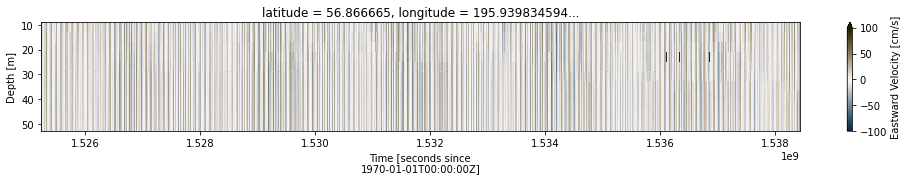

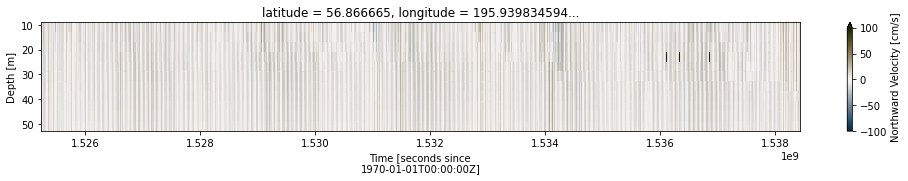

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cmocean
print(cmocean.cm.cmapnames)
fig, ax = plt.subplots(figsize=(17, 2))
ds.u_1205.T.plot(ax=ax,vmin=-100,vmax=100,cmap=cmocean.cm.diff)
ax.invert_yaxis()
fig, ax = plt.subplots(figsize=(17, 2))
ds.v_1206.T.plot(ax=ax,vmin=-100,vmax=100,cmap=cmocean.cm.diff)
ax.invert_yaxis()

In [64]:
from scipy.io import loadmat


In [65]:
file = loadmat('/Users/bell/in_and_outbox/2020/coklet/9234.mat')


In [66]:
print(file.keys())
print(file['__header__'])
print(file['__version__'])
print(file['__globals__'])
print(file['fdat'][0][0::])

dict_keys(['__header__', '__version__', '__globals__', 'fdat'])
b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue May  5 15:41:51 2020'
1.0
[]
[array([[(array([[(array([[9234]], dtype=int32), array([[-1]], dtype=int32), array([[6080]], dtype=int32), array([[65731]], dtype=int32), array([[60]], dtype=int32))]],
      dtype=[('sn', 'O'), ('dive', 'O'), ('dacid', 'O'), ('imei', 'O'), ('wmoid', 'O')]), array([[-1]], dtype=int32), array([[71.30066]]), array([[-156.78673]]), array([[2458626.91300926]]), array([[2]], dtype=uint8))]],
      dtype=[('lis', 'O'), ('dive', 'O'), ('lat', 'O'), ('lon', 'O'), ('juld', 'O'), ('pos', 'O')])
 array([[(array([[(array([[9234]], dtype=int32), array([[0]], dtype=int32), array([[6080]], dtype=int32), array([[65731]], dtype=int32), array([[60]], dtype=int32))]],
      dtype=[('sn', 'O'), ('dive', 'O'), ('dacid', 'O'), ('imei', 'O'), ('wmoid', 'O')]), array([[(array([[43.72, 42.56, 41.52, 40.44, 39.48, 38.48, 37.48, 36.52, 35.56,
        34.48, 33.52, 